In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

esperanza_vida = pd.read_csv("../datos reales/esperanza_vida.csv").drop("Series Code", axis=1)
def Cambiar(s : str):
    if s[-1]==']': return s[:4]
    return s

esperanza_vida.columns = list(map(Cambiar, esperanza_vida.columns))
esperanza_vida[esperanza_vida=='..'] = pd.NA

colmujer = esperanza_vida['Series Name'].unique()[0]
colhombre = esperanza_vida['Series Name'].unique()[1]
coltotal = esperanza_vida['Series Name'].unique()[2]

mujeres = esperanza_vida[esperanza_vida['Series Name']==colmujer]
hombres = esperanza_vida[esperanza_vida['Series Name']==colhombre]
total = esperanza_vida[esperanza_vida['Series Name']==coltotal]

percentiles_ingresos = pd.read_csv("../datos reales/percentiles_ingresos_PPA_2011.csv")

def Sintetizador(tam = 100):
    def Sintesis(ingresos):
        sintesis = 0
        for ini in range(0,100,tam):
            rango = ingresos.iloc[ini:(ini+tam)]
            peso = np.sum(rango['pop_share'])
            avg_rango = np.sum(rango['avg_welfare'] * rango['pop_share'])/peso
            sintesis += np.log(avg_rango)*peso
        return sintesis
    return Sintesis

def GenerarMuestra(datos_originales, evida, umbral):
    muestras = dict()
    for year in sorted(datos_originales['year'].unique()):
        datos_anio = datos_originales[datos_originales['year']==year]
        paises = datos_anio['country_code'].unique()
        
        paises = list(filter(lambda x : 
            sum(datos_anio['country_code']==x)==100, paises
        ))
        esp_vida = evida[~ total[str(year)].isna()]
        paises = set(paises).intersection(esp_vida['Country Code'].unique())
        paises = list(paises) 

        if len(paises) < umbral: continue
        
        grupos_in = datos_anio.groupby('country_code')
        
        muestras[year] = []
        
        esp_vida.set_index('Country Code', inplace=True)

        for country in paises:
            tams = (1,10,20,100)
            muestra = []
            for (i,tam) in enumerate(tams):
                muestra.append(Sintetizador(tam)(grupos_in.get_group(country)))
            muestras[year].append((country,muestra, esp_vida.loc[country][str(year)]))
    return muestras

percentiles_ingresos_ni = percentiles_ingresos[
    np.array(percentiles_ingresos['welfare_type']=='income') &
    np.array(percentiles_ingresos['reporting_level']=='national')
]

percentiles_ingresos_comp = percentiles_ingresos[
    np.array(percentiles_ingresos['welfare_type']=='consumption') &
    np.array(percentiles_ingresos['reporting_level']=='national')
]

muestras_ingreso = GenerarMuestra(percentiles_ingresos_ni,total,30)
muestras_consumo = GenerarMuestra(percentiles_ingresos_comp,total,30)



In [517]:
import random
def GenerarSeriesQuantilica(muestras, metrica, samples = 10):
    
    xs = list(sorted(muestras.keys()))
    yq1 = [[] for _ in range(4)]
    yq2 = [[] for _ in range(4)]
    yq3 = [[] for _ in range(4)]
    for x in xs:
        muestra = muestras[x]
        
        series = [[] for i in range(4)]
        
        random.seed(123456)
        remuestreos = [
            random.choices(muestra,k=len(muestra)) for _ in range(samples)
        ]
        for remuestreo in remuestreos:
            for i in range(4):
                a = [item[1][i] for item in remuestreo]
                b = [float(item[2]) for item in remuestreo]
                series[i].append(metrica(a,b))
        for i in range(4):
            yq1[i].append(np.quantile(series[i],q=0.25))
            yq2[i].append(np.quantile(series[i],q=0.5 ))
            yq3[i].append(np.quantile(series[i],q=0.75))
            
        # for i in range(4):
        #    a = [item[1][i] for item in muestra]
        #    b = [float(item[2]) for item in muestra]
        #    series.append(metrica(a,b))
        # ys.append(tuple(series))
    return xs,yq1, yq2, yq3

In [521]:
yq2

[[0.8692539122971857,
  0.8612917099036574,
  0.8446312234328028,
  0.8364012866875765,
  0.8423766889159436,
  0.8614662066345334,
  0.8740212354758259,
  0.8868038725903774,
  0.8489506375795204,
  0.9090682667738175,
  0.8302583736663345,
  0.8296612953335205,
  0.8028888262246581,
  0.781700006214697,
  0.7842739004946081,
  0.7741724166638209,
  0.7856264800063621,
  0.7889914232319407,
  0.7870174095579434],
 [0.8695530169308678,
  0.8620765114930266,
  0.8439691613065038,
  0.8362096434843846,
  0.8421160215345868,
  0.8614536320368754,
  0.8739583489900524,
  0.8866457175396825,
  0.8489659478950065,
  0.9089590586808003,
  0.8291667638475251,
  0.8285555952787953,
  0.8028995089849995,
  0.7809320487825175,
  0.7835816654714275,
  0.774924427336846,
  0.7872750932235228,
  0.7911907787531913,
  0.7879548605313134],
 [0.869381543220916,
  0.8632432999460147,
  0.8430121501694223,
  0.8361028618718469,
  0.8426514799149536,
  0.862293363141826,
  0.8742478563790257,
  0.88719375

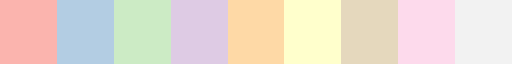

In [548]:
cmap

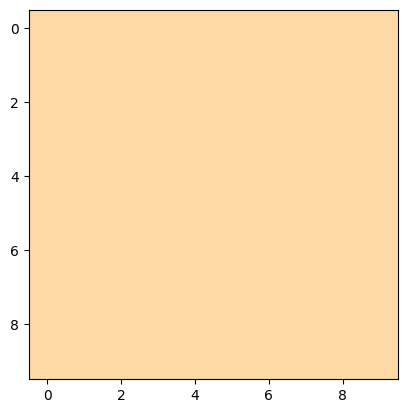

In [549]:
square = np.full((10,10,4), cmap(0.5))
plt.imshow(square)

In [541]:
cmap(0)

(0.984313725490196, 0.7058823529411765, 0.6823529411764706, 1.0)

(0.984313725490196, 0.7058823529411765, 0.6823529411764706, 1.0)
(0.7019607843137254, 0.803921568627451, 0.8901960784313725, 1.0)
(0.8, 0.9215686274509803, 0.7725490196078432, 1.0)
(0.8705882352941177, 0.796078431372549, 0.8941176470588236, 1.0)
(0.984313725490196, 0.7058823529411765, 0.6823529411764706, 1.0)
(0.7019607843137254, 0.803921568627451, 0.8901960784313725, 1.0)
(0.8, 0.9215686274509803, 0.7725490196078432, 1.0)
(0.8705882352941177, 0.796078431372549, 0.8941176470588236, 1.0)


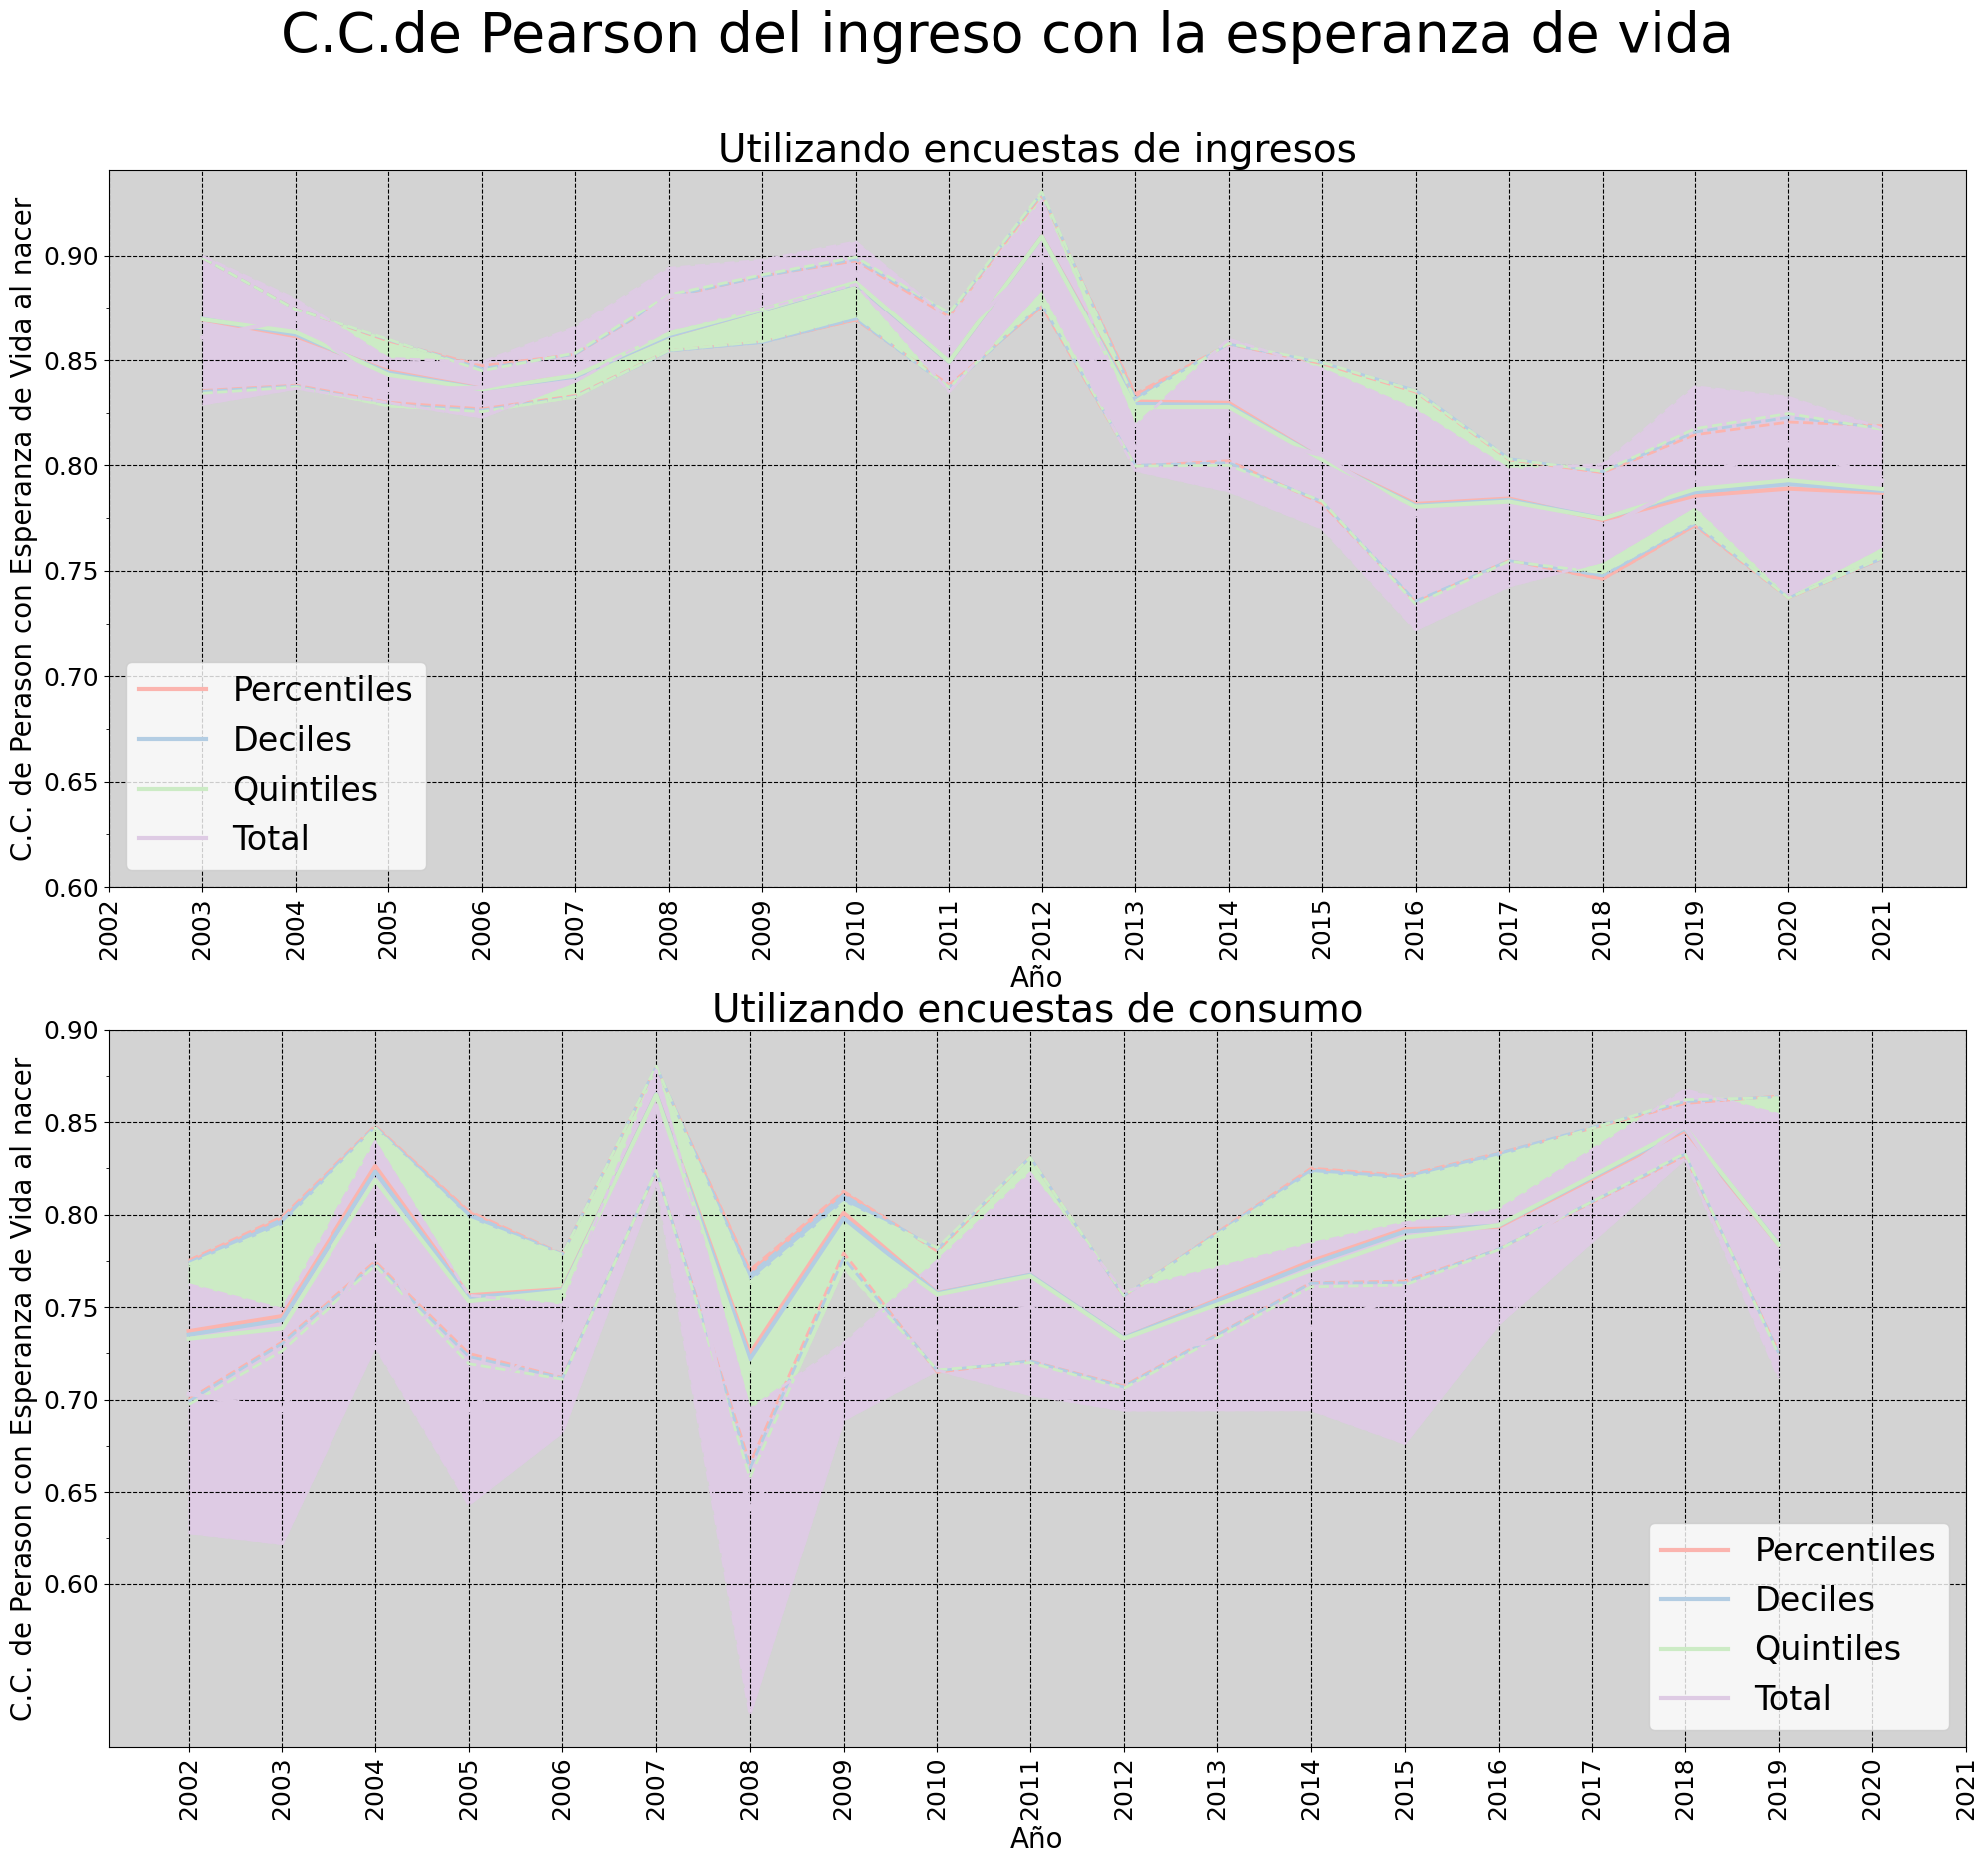

In [552]:
fig, axs = plt.subplots(2,1, figsize=(24,20))
fig.subplots_adjust(top=0.90) 
fig.suptitle('C.C.de Pearson del ingreso con la esperanza de vida', fontsize=40)

muestras = [muestras_ingreso, muestras_consumo]
nombres_m = ["ingresos","consumo"]
nombres =  ["Percentiles","Deciles","Quintiles","Total"]
estilos =  ['-','--','-.',':']

xticks = list(range(2002,2022))
xlabel_ticks = list(map(str, xticks))

yticks_mayor = np.linspace(0.6,0.9,7)
yticks_menor = np.linspace(0.6,0.9,13)


cmap = plt.get_cmap('Pastel1')
for (ax,muestra,nombre_muestra) in zip(axs,muestras,nombres_m):
    xs, yq1, yq2, yq3 = GenerarSeriesQuantilica(muestra, lambda x,y : np.corrcoef(x,y)[0,1])
    for (i, nombre, estilo) in zip(range(4),nombres,estilos):
        color = cmap(i)
        print(color)
        ax.plot(xs,yq2[i], label = nombre, linewidth=3, c=color)
        ax.plot(xs,yq1[i], linewidth=2, linestyle='--', c=color)
        ax.plot(xs,yq3[i], linewidth=2, linestyle='--', c=color)
        ax.fill_between(xs, yq1[i], yq3[i], alpha=0.25, color=color)

    ax.set_ylabel("C.C. de Perason con Esperanza de Vida al nacer", fontsize=20)
    ax.set_xlabel("Año", fontsize=20)
    ax.set_title(f"Utilizando encuestas de {nombre_muestra}", fontsize = 28)
    ax.set_xticks(ticks = xticks, labels= xlabel_ticks, rotation=90, fontsize=18)
    # ax.set_xticks(ticks = xticks, labels=[None]*len(xticks))
    ax.set_yticks(ticks = yticks_mayor, minor=False, labels=list(map(lambda x: f"{x:.2f}", yticks_mayor)), fontsize=18)
    ax.set_yticks(ticks = yticks_menor, minor=True)
    ax.grid(c='black', linestyle='--')
    ax.set_facecolor('lightgray')
    ax.legend(fontsize=24)

